In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving car_details.csv to car_details.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor



In [ ]:
df=pd.read_csv('car data.csv')    
df.shape   


(301, 9)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
print(df['Fuel_Type'].unique() , df['Seller_Type'].unique() ,  df['Owner'].unique() ,  df['Transmission'].unique())   

['Petrol' 'Diesel' 'CNG'] ['Dealer' 'Individual'] [0 1 3] ['Manual' 'Automatic']


In [ ]:
df.isnull().sum()   


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]   
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
final_dataset['Current Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [ ]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year'] 
final_dataset.head()



,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [ ]:
final_dataset.corr()   

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_year,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index   


In [ ]:
X=final_dataset.iloc[:,1:]
X.head()   

,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2021,7,0,1,0,1
1,9.54,43000,0,2021,8,1,0,0,1
2,9.85,6900,0,2021,4,0,1,0,1
3,4.15,5200,0,2021,10,0,1,0,1
4,6.87,42450,0,2021,7,1,0,0,1


In [ ]:
y=final_dataset.iloc[:,0]   
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
model = ExtraTreesRegressor()
model.fit(X,y)   
model.feature_importances_

array([0.37999214, 0.04249327, 0.0013796 , 0.07622002, 0.21459634,
       0.01776298, 0.12673443, 0.14082123])

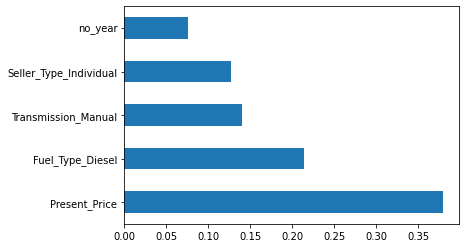

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh')     

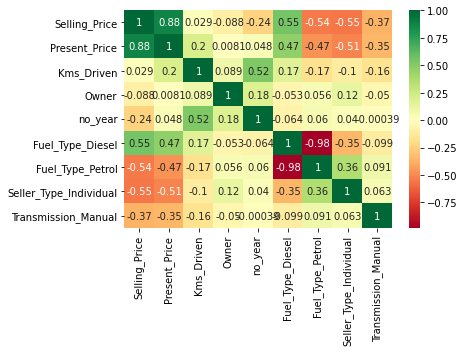

In [ ]:
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")   

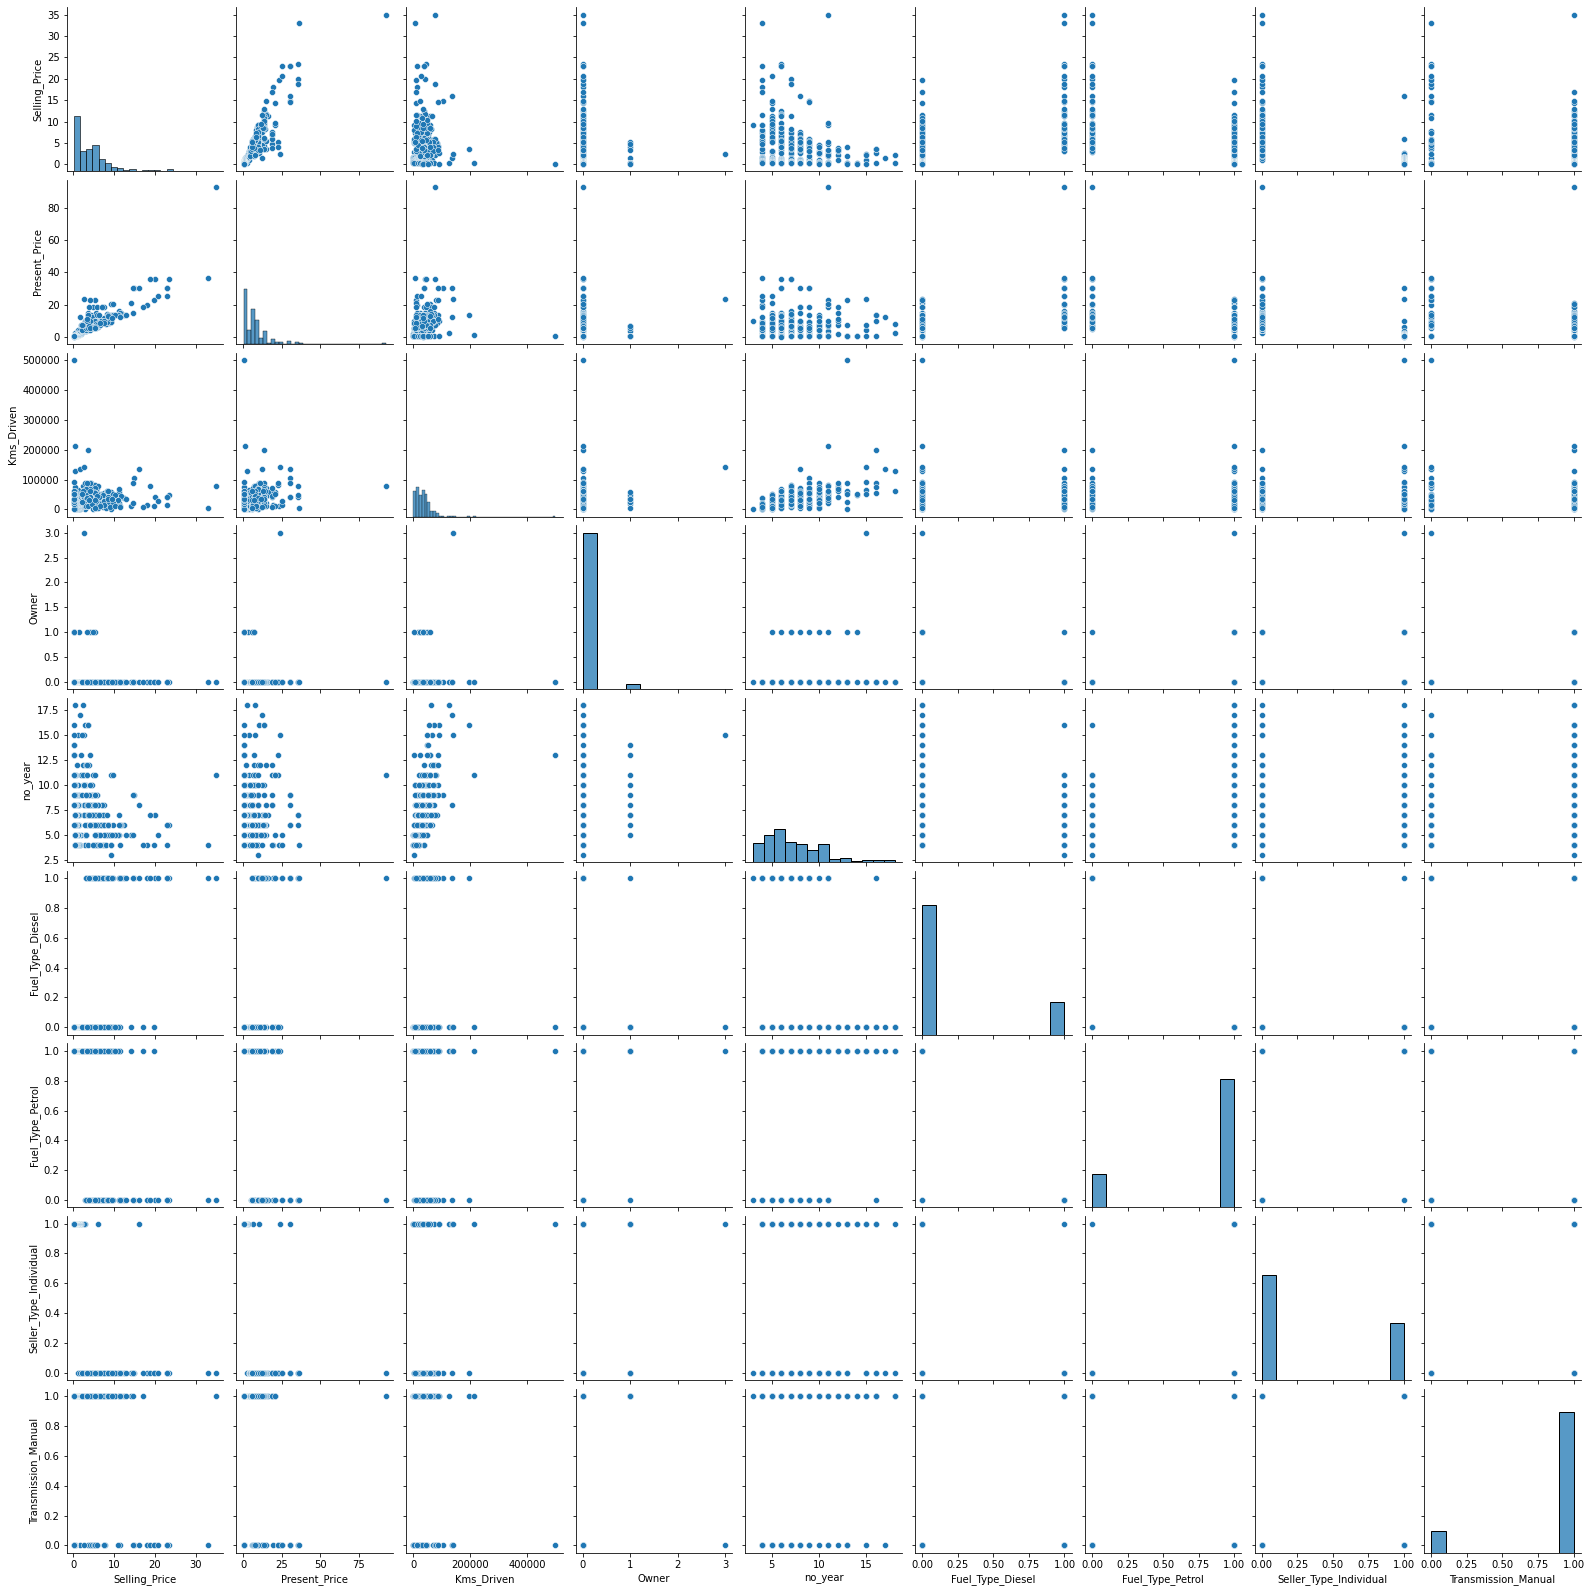

In [ ]:
sns.pairplot(final_dataset)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_train.shape

(240, 8)

In [ ]:
#Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)   
predictions_decisiontree=decision_tree.predict(X_test)
print(predictions_decisiontree)
 


[ 6.85  0.4   4.4   7.75 17.    5.3   3.45  0.4   3.5   4.5   2.    0.9
  4.9   6.7   7.75 17.    6.4   4.    0.45  1.65  2.95  4.9   4.5   9.15
  0.2   0.75  0.1   0.6   0.45  3.8   2.25  5.95  0.45  8.35  3.35  1.2
  5.8   4.5   0.2   6.25  7.25 18.75  4.9   4.4   5.5  11.5   0.25  0.75
  5.    6.75  5.35  3.1   4.95 23.    1.11  1.11  0.42  2.95  3.9   3.35
  3.49]


In [ ]:
print(y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_decisiontree))   #for printing the value of mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, predictions_decisiontree))   #for printing the value of mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_decisiontree)))   #for printing the value of root mean square error


MAE: 0.6913114754098361
MSE: 1.371027868852459
RMSE: 1.1709089925576877


In [ ]:
r2 = r2_score(y_test,predictions_decisiontree)    
print('r2 score for the model is', r2)   
errors = abs(predictions_decisiontree - y_test)   
mape = np.mean(100 * (errors / y_test))  
accuracy_3= 100 - mape   
print('Accuracy:',accuracy_3, '%')   



r2 score for the model is 0.945760549520287
Accuracy: 83.71081035767594 %


In [ ]:
#Random Forest Regressor
rf_random=RandomForestRegressor() 
rf_random.fit(X_train,y_train)
predictions=rf_random.predict(X_test) 
print(predictions)

[ 6.631   0.4608  4.5915  8.895  15.2449  5.2365  3.172   0.4302  3.831
  4.8155  2.9145  0.7523  4.8375  7.2623  7.7299 14.9212  6.8005  4.0155
  0.4487  1.5875  3.125   4.9165  5.2835  9.8777  0.1984  0.7345  0.3141
  0.7159  0.4809  4.1851  2.5315  5.95    0.4842  7.6218  3.2695  1.1696
  5.6775  5.449   0.2432  8.362   7.7908 23.29    4.8695  4.4425  5.7555
 11.5071  0.2484  0.7999  5.3905  6.684   6.4513  3.11    5.275  24.6525
  1.168   1.134   0.4828  2.4745  3.5085  2.5771  3.9606]


In [ ]:
print(y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))   #for printing the value of mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, predictions))   #for printing the value of mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))   #for printing the value of root mean square error


MAE: 0.6144081967213114
MSE: 1.078032805737704
RMSE: 1.0382835863759496


In [ ]:
r2 = r2_score(y_test,predictions)
print('r2 score for the model is', r2)   
errors = abs(predictions - y_test)
errors = abs(predictions - y_test)   
mape = np.mean(100 * (errors / y_test))
accuracy_2= 100 - mape   
print('Accuracy:',accuracy_2, '%')   


r2 score for the model is 0.9573517735775445
Accuracy: 87.92148096312997 %


In [ ]:
#Extra Trees Regressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train) 
predictions_model=model.predict(X_test)
print(predictions_model)



[ 6.8975  0.3941  4.487   9.271  21.0997  5.3285  3.2425  0.4644  4.0875
  4.496   2.9805  0.7448  4.7835  6.9619  7.75   15.103   6.3774  3.9875
  0.4646  1.651   3.421   4.9655  5.314   9.434   0.1831  0.7388  0.3919
  0.692   0.4464  3.952   3.3019  5.9025  0.5049  8.0583  3.314   1.1795
  5.5475  6.29    0.2116  9.8892  8.8135 22.6665  4.867   4.256   5.5245
 12.9038  0.2548  0.9014  5.018   7.0335  7.6875  3.1115  5.0585 23.565
  1.1676  1.1409  0.5123  2.581   3.3935  2.172   3.2978]


In [ ]:
print(y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_model))   
print('MSE:', metrics.mean_squared_error(y_test, predictions_model))    
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_model)))   


MAE: 0.5426114754098366
MSE: 0.9695650008196728
RMSE: 0.9846649180404838


In [ ]:
r2 = r2_score(y_test,predictions_model)    
print('r2 score for the model is', r2)  
errors = abs(predictions_model - y_test)  
mape = np.mean(100 * (errors / y_test))  
accuracy_2= 100 - mape   
print('Accuracy:',accuracy_2, '%')   


r2 score for the model is 0.9616428855725319
Accuracy: 89.12839031153007 %


In [ ]:
#Bagging Regressor
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)   
predictions_bagging=bagging.predict(X_test)
print(predictions_bagging)



[ 6.85   0.54   4.475  8.715 15.069  5.21   3.15   0.425  3.74   4.97
  2.73   0.771  4.565  7.64   7.7   15.398  7.05   3.92   0.474  1.61
  3.3    4.73   5.325 10.113  0.189  0.74   0.285  0.619  0.482  4.58
  2.909  5.715  0.499  7.245  3.135  1.14   5.88   5.66   0.28   7.685
  7.874 23.725  4.715  4.6    5.605 10.76   0.25   0.761  5.285  6.4
  6.03   3.27   5.365 24.975  1.177  1.121  0.532  2.325  3.57   2.385
  3.397]


In [ ]:
print(y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_bagging))   #for printing the value of mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, predictions_bagging))    #for printing the value of mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_bagging)))   #for printing the value of root mean square error


MAE: 0.6473278688524592
MSE: 1.160726377049181
RMSE: 1.0773701207334372


In [ ]:
r2 = r2_score(y_test,predictions_bagging)   
print('r2 score for the is', r2)   
errors = abs(predictions_bagging - y_test)   
mape = np.mean(100 * (errors / y_test))   
accuracy_4= 100 - mape   
print('Accuracy:',accuracy_4, '%')   


r2 score for the is 0.9540803201169423
Accuracy: 87.57401712607641 %
